<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/notebooks/01c_challenges_and_extra_curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises / extra curriculum Section 3

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [13]:
import math
import tensorflow as tf

y = list(map(lambda val: (val**2 - 5*val) / 768, range(1, 10000)))
X = list(range(1, 10000))

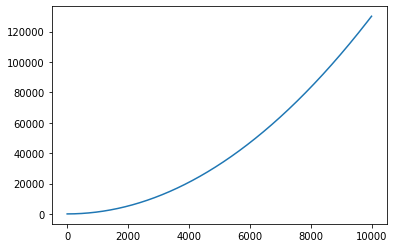

In [14]:
import matplotlib.pyplot as plt
plt.plot(X, y)


In [15]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_train = tf.constant(y_train)
X_train = tf.constant(X_train)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [16]:
model_1 = tf.keras.models.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_1")

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"],
                loss="mae")

history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10, verbose=0)


In [17]:
model_1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 12454.7100 - mae: 12454.7100


[12454.7099609375, 12454.7099609375]

In [18]:
y_pred = model_1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


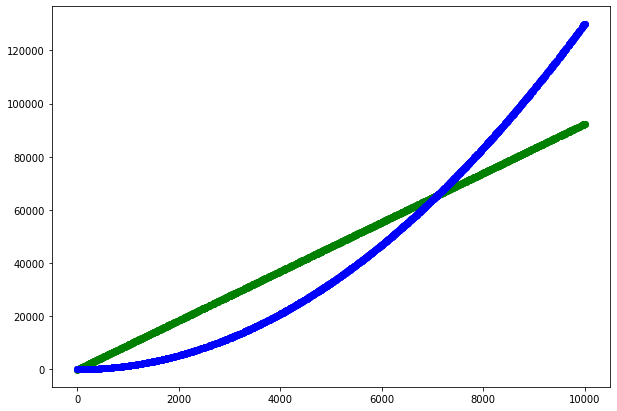

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_pred, c="g")
plt.scatter(X_test, y_test, c="b")

Seems like there is no good linear solution to a set where the dependent variable is the result of an exponential equation of the independent variable.

## 2. Try and improve the results we got on the insurance dataset, some things you might want to try include:

- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?


In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54ba739e50>,
      dtype=object)

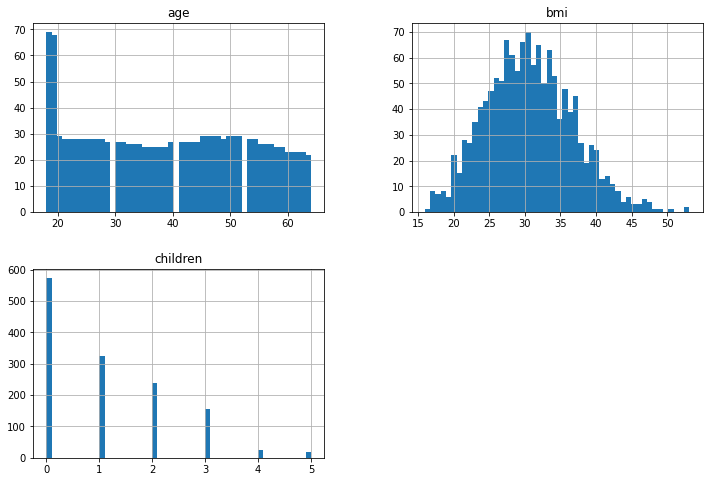

In [23]:
insurance.hist(bins=50, figsize=(12,8), column=['age', 'bmi', 'children'])

age seems to be capped at 16 or 18, bmi is slightly skewed right but ok.



In [24]:
# one-hot encode smoker and sex
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [29]:
# split data
X = insurance.drop("charges", axis=1)
y = insurance['charges']

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [31]:
# scale / normalize data
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
ct = make_column_transformer((MinMaxScaler(), ['age', 'children', 'bmi']))

ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'children', 'bmi'])])